In [267]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv


# 1 -> import libraries
# 2 -> load dataset
# 3 -> columns , value count 
# 4 -> categorised the data into cat , num , bool , int 
# 5 -> 

In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
df_USA=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv')

In [270]:
df_USA.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [271]:
df_USA.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [272]:
df_USA.dtypes.value_counts()

object     20
float64    13
bool       13
int64       1
dtype: int64

# Shape of original data 

In [273]:
df_USA.shape   # USA DATASET 

(2845342, 47)

num_col=df.select_dtypes('number')
cat_col=df.select_dtypes('object')
bool_col=df.select_dtypes('bool')
float_col=df.select_dtypes('float64')
float_col=df.select_dtypes('int64')



missing_data = df.isna().sum(axis=0).sort_values(ascending=True)
missing_data = missing_data.to_frame()
missing_data.columns = ['missing_count']
missing_data = missing_data.loc[missing_data['missing_count']>0]

missing_data

In [274]:
# COLUMN NUMBER has highest no of null value , we cam drop that col further

In [275]:
df_USA.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [276]:
df_USA.State.unique

<bound method Series.unique of 0          OH
1          OH
2          OH
3          OH
4          OH
           ..
2845337    CA
2845338    CA
2845339    CA
2845340    CA
2845341    CA
Name: State, Length: 2845342, dtype: object>

In [277]:
df1=df_USA[df_USA['State']=='CA']

In [335]:
df1['IDD'] = df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [336]:
df1

,ID,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Street,Side,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,start_date,start_time,end_date,end_time,IDD
994,A-995,2,36.990300,-119.711460,36.990460,-119.711380,0.012,NaN,N Friant Rd,R,...,False,Night,Night,Night,Night,2016-03-23,03:48:55,2016-03-23,09:48:55,995
1041,A-1042,3,38.618901,-121.416952,38.618240,-121.415470,0.092,2117.0,Marconi Ave,L,...,False,Night,Night,Night,Night,2016-03-24,04:52:36,2016-03-24,10:52:36,1042
1162,A-1163,3,38.708064,-121.308638,38.708064,-121.308639,0.000,NaN,I-80 E,R,...,False,Night,Night,Day,Day,2016-03-26,06:29:10,2016-03-26,12:29:10,1163
1173,A-1174,2,38.231472,-122.112049,38.231894,-122.111079,0.060,NaN,I-80 W,R,...,False,Night,Day,Day,Day,2016-03-28,06:41:55,2016-03-28,12:41:55,1174
1214,A-1215,2,38.533780,-123.275712,38.533744,-123.275304,0.022,21025.0,Timber Cove Rd,L,...,False,Night,Night,Night,Night,2016-03-28,21:48:12,2016-03-29,03:48:12,1215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,34.002480,-117.379360,33.998880,-117.370940,0.543,NaN,Pomona Fwy E,R,...,False,Day,Day,Day,Day,2019-08-23,18:03:25,2019-08-23,18:32:01,2845338
2845338,A-2845339,2,32.766960,-117.148060,32.765550,-117.153630,0.338,NaN,I-8 W,R,...,False,Day,Day,Day,Day,2019-08-23,19:11:30,2019-08-23,19:38:23,2845339
2845339,A-2845340,2,33.775450,-117.847790,33.777400,-117.857270,0.561,NaN,Garden Grove Fwy,R,...,False,Day,Day,Day,Day,2019-08-23,19:00:21,2019-08-23,19:28:49,2845340
2845340,A-2845341,2,33.992460,-118.403020,33.983110,-118.395650,0.772,NaN,San Diego Fwy S,R,...,False,Day,Day,Day,Day,2019-08-23,19:00:21,2019-08-23,19:29:42,2845341


In [333]:
#df1['ID'].astype('int64')
#df1['ID'] = df1['ID'].astype(int)

In [278]:
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,False,Day,Day,Day,Day
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,False,Day,Day,Day,Day
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,False,Night,Night,Night,Night


In [279]:
df1.shape

(795868, 47)

In [280]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [281]:
df1.duplicated().sum()

0

In [282]:
d1f=df1.dropna(subset=['Precipitation(in)'])    

In [283]:
df1.shape

(795868, 47)

In [284]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [285]:
df1.shape

(660714, 47)

In [286]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   64.691077
Street                    0.000000
Side                      0.000000
City                      0.000908
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)   

In [287]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [288]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   64.692848
Street                    0.000000
Side                      0.000000
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)   

In [289]:
df1['Weather_Condition'].value_counts()

Fair                  394003
Cloudy                 77014
Mostly Cloudy          53081
Partly Cloudy          43344
Haze                   23761
                       ...  
Thunder / Windy            1
Thunder and Hail           1
Blowing Sand               1
Drizzle / Windy            1
Light Freezing Fog         1
Name: Weather_Condition, Length: 64, dtype: int64

In [290]:
df1.Side.unique()

array(['R', 'L'], dtype=object)

In [291]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [292]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,660682
1,Start_Time,445463
2,End_Time,562764
3,Description,259890
4,Street,36268
5,Side,2
6,City,1080
7,County,58
8,State,1
9,Zipcode,69204


num_col=df.select_dtypes('number')
cat_col=df.select_dtypes('object')
bool_col=df.select_dtypes('bool')
float_col=df.select_dtypes('float64')
int_col=df.select_dtypes('int64')


In [293]:
df1.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [294]:
del df1['Airport_Code']

In [296]:
df_num.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

In [297]:
len(df_num.columns)

14

In [298]:
df_cat.columns

Index(['ID', 'Start_Time', 'End_Time', 'Street', 'Side', 'City', 'County',
       'State', 'Country', 'Timezone', 'Wind_Direction', 'Weather_Condition',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [299]:
#bool_col.columns

In [300]:
#int_col.columns

In [301]:
#cat_col.head()

In [303]:
len(df['City'].unique())

1021

In [304]:
#cat_col

In [305]:
#num_col_1=df.select_dtypes('number')

# Numeric Data

In [306]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,4
1,Start_Lat,224687
2,Start_Lng,228347
3,End_Lat,223928
4,End_Lng,227922
5,Distance(mi),7988
6,Number,27965
7,Temperature(F),170
8,Wind_Chill(F),302
9,Humidity(%),100


<AxesSubplot:>

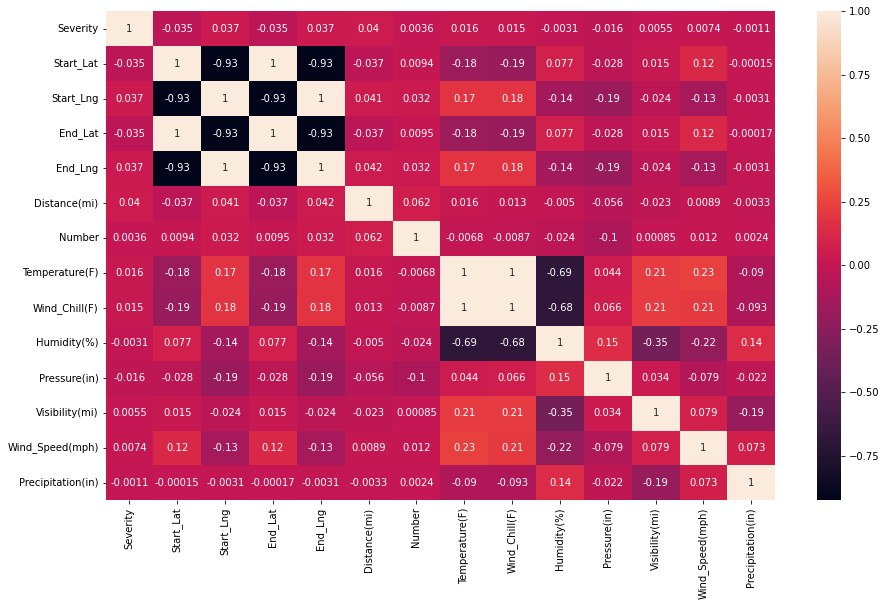

In [307]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [308]:
cities = df1['City'].unique()
len(cities)

1080

In [309]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

Los Angeles                       56478
Sacramento                        28816
San Diego                         22011
Bakersfield                       11511
Riverside                         10963
                                  ...  
Anaheim-Santa Ana-Garden Grove        1
Hidden Hills                          1
La Mesa                               1
Poway                                 1
Canyon Lake                           1
Name: City, Length: 1080, dtype: int64

In [310]:
#top 10 cities by number of accident
accidents_by_cities[:10]

Los Angeles       56478
Sacramento        28816
San Diego         22011
Bakersfield       11511
Riverside         10963
San Jose           9905
San Bernardino     9838
Anaheim            8657
Fresno             8633
Ontario            8609
Name: City, dtype: int64

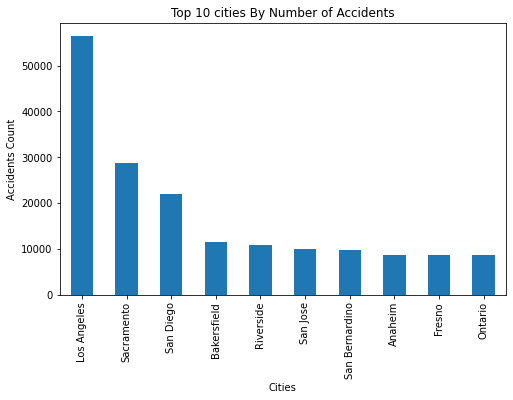

In [311]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [337]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

Severity
1      4919
2    644918
3      6317
4      4528
Name: ID, dtype: int64

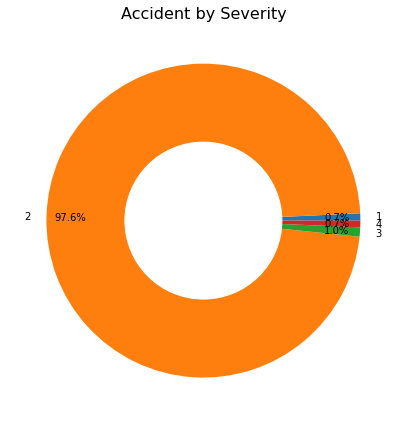

In [338]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))
label = [1,2,3,4]
plt.pie(accidents_severity, labels=label,
        autopct='%1.1f%%', pctdistance=0.85)
circle = plt.Circle( (0,0), 0.5, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
ax.set_title("Accident by Severity",fontdict={'fontsize': 16})
plt.tight_layout()
plt.show()

In [317]:
df1['Start_Time'].dtypes

dtype('O')

In [318]:
df1['End_Time'].dtypes

dtype('O')

In [319]:
df1 = df1.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df1['Start_Time'].dtypes

dtype('<M8[ns]')

In [320]:
df1['Start_Time'][2408]

Timestamp('2016-04-22 12:54:44')

In [321]:
df1['End_Time'][2408]

Timestamp('2016-04-22 18:54:44')

In [322]:
df1['start_date'] = [d.date() for d in df1['Start_Time']]
df1['start_time'] = [d.time() for d in df1['Start_Time']]

In [323]:
df1['end_date'] = [d.date() for d in df1['End_Time']]
df1['end_time'] = [d.time() for d in df1['End_Time']]

In [324]:
df1['end_time']

994        09:48:55
1041       10:52:36
1162       12:29:10
1173       12:41:55
1214       03:48:12
             ...   
2845337    18:32:01
2845338    19:38:23
2845339    19:28:49
2845340    19:29:42
2845341    19:21:31
Name: end_time, Length: 660682, dtype: object

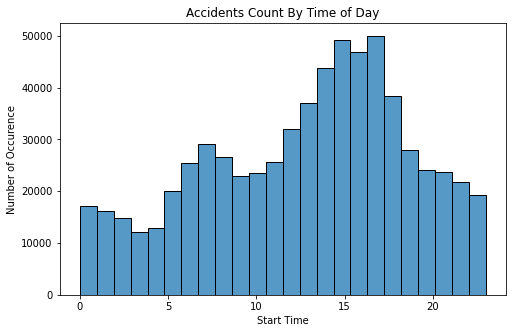

In [325]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

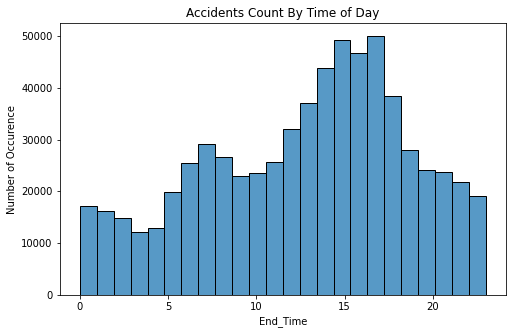

In [326]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [329]:
del df1['Start_Time']
del df1['End_Time']

In [ ]:
#df.head()

In [ ]:
%matplotlib inline
import os

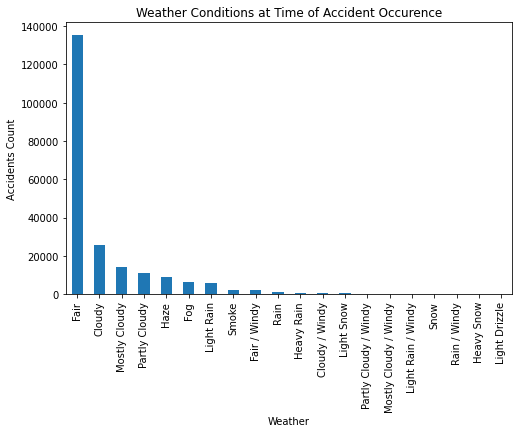

In [328]:
fig, ax = plt.subplots(figsize=(8,5))
weather_conditions.sort_values(ascending=False)[:20].plot(kind='bar')
ax.set(title = 'Weather Conditions at Time of Accident Occurence',
       xlabel = 'Weather',
       ylabel = 'Accidents Count')
plt.show()

#  most accidents happened when the weather was 'fair'. Perhaps weather (bad weather) was not a big contributing factor to accidents.

In [ ]:
#df_num.head()

In [ ]:
# shape of original data -> 2845342 rows

In [ ]:
df.shape  # shape of data after removing null values 

In [ ]:
df_num.shape

In [341]:
# Accidents by order of severity (1 being lowest, and 4 being highest)

df1.groupby('Severity').count()['IDD']

Severity
1      4919
2    644918
3      6317
4      4528
Name: IDD, dtype: int64

In [ ]:
# scatter plot

<AxesSubplot:xlabel='Severity', ylabel='Start_Lat'>

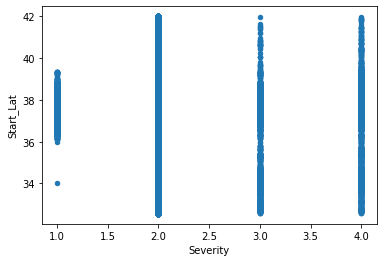

In [342]:

df_num.plot(kind='scatter', y='Start_Lat', x='Severity')


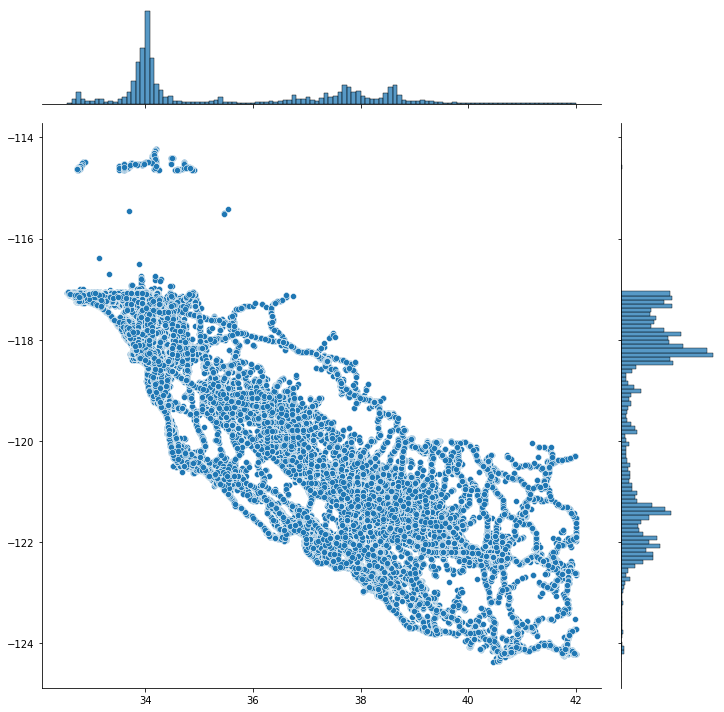

In [350]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

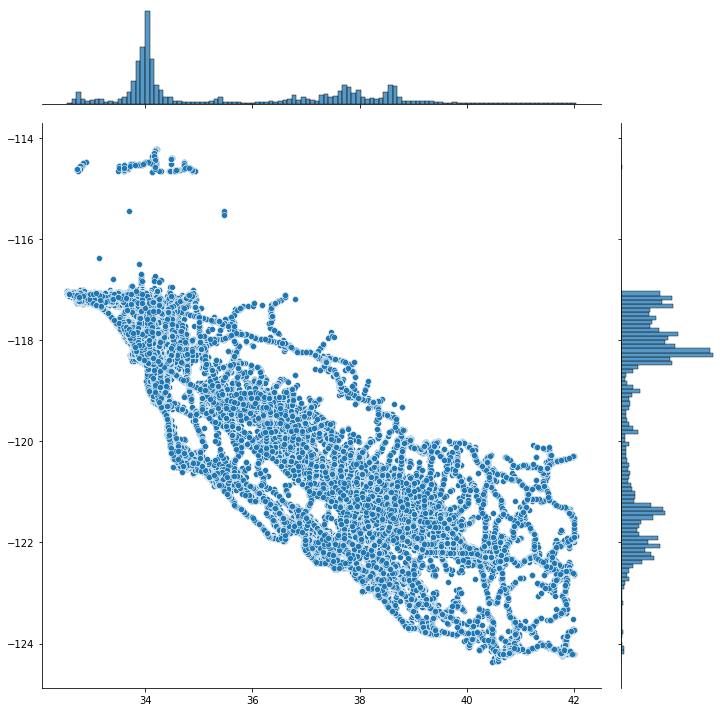

In [349]:
sns.jointplot(x=df_num.End_Lat.values , y=df_num.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()